In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time
import sys
import math
import datetime
from math import radians, cos, sin, asin, sqrt
from matplotlib.colors import LogNorm
import csv
from io import StringIO
from sklearn import linear_model

#import tensorflow as tf
plt.rcParams["font.sans-serif"]=["SimHei"] #用来正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False #用来正常显示负号

In [2]:
import re                                               
def go_split(s, symbol):
    # 拼接正则表达式
    symbol = "[" + symbol + "]+"
    # 一次性分割字符串
    result = re.split(symbol, s)
    # 去除空字符
    return [x for x in result if x]

In [3]:
def str_num(path):
    lon = []
    lat = []
    path1 = path.replace("'",'')
    path2 = path1.replace(";",",")
    path3 = path2.replace(' ','')
    path4 = path3.replace('[','')
    path5 = path4.replace(']','')
    path_re = path5.split(',')
    for i in range(len(path_re)):
        if i%2 == 0:
            lat.append(float(path_re[i]))
        else:
            lon.append(float(path_re[i]))
    return lon,lat
filename = 'bike.csv'
path = []
path_small = []
bikeid = []
count = 0
with open(filename,'rt',encoding='gbk') as csvfile:
    reader = csv.reader(csvfile)
    for record in reader:
        if len(record) == 2:
            bikeid.append(record[0])
            if count != 0:
                path.append(path_small)
                count = 0
                path_small = []  
                
        if len(record) == 5:
            count += 1
            path_small.append(record[4])
path.append(path_small)
csvfile.close()   


In [4]:
col = ['darkgoldenrod','darkgray', 'darkgreen','darkkhaki','darkmagenta','darkorange','darkorchid','darkred','darksalmon','orange','lightgreen', 'lightgray','lightpink','lightsalmon','lightseagreen','lightskyblue','lightslategray','lightsteelblue','lightyellow', 
'lime','cornflowerblue','cornsilk','crimson','cyan', 'darkblue','darkcyan','aliceblue','antiquewhite','aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue','blueviolet','brown', 
'burlywood', 'cadetblue','chartreuse','chocolate', 'coral', 'darkolivegreen', 'darkseagreen',
'darkslateblue', 'darkslategray','darkturquoise','darkviolet', 'deeppink','deepskyblue','dimgray','dodgerblue', 'firebrick','floralwhite', 
'forestgreen', 'fuchsia','gainsboro', 'ghostwhite','gold','goldenrod','gray','green', 'greenyellow', 'honeydew','hotpink','indianred', 
'indigo', 'ivory','khaki','lavender','lavenderblush','lawngreen','lemonchiffon','lightblue','lightcoral', 'lightcyan', 'lightgoldenrodyellow', 
'lightgreen', 'lightgray','lightpink','lightsalmon','lightseagreen','lightskyblue','lightslategray','lightsteelblue','lightyellow', 
'lime', 'limegreen','linen','magenta', 'maroon','mediumaquamarine','mediumblue','mediumorchid','mediumpurple','mediumseagreen', 
'mediumslateblue', 'mediumspringgreen','mediumturquoise','mediumvioletred','midnightblue', 'mintcream','mistyrose','moccasin', 
'navajowhite', 'navy','oldlace','olive','olivedrab','orangered','orchid','palegoldenrod','palegreen','paleturquoise', 
'palevioletred','papayawhip','peachpuff','peru','pink','plum','powderblue','purple','red','rosybrown','royalblue','saddlebrown','salmon', 
'sandybrown', 'seagreen','seashell', 'sienna','silver','skyblue','slateblue','slategray','snow','springgreen','steelblue','tan','teal', 
'thistle', 'tomato','turquoise','violet', 'wheat', 'white','whitesmoke','yellow', 'yellowgreen'] 

In [5]:
df2=pd.read_csv('北京边界数据.csv')   #北京边界
bj_x=df2["x"].tolist()
bj_y=df2["y"].tolist()

In [6]:
cy=39.91667   #北京市中心坐标
cx=116.41667

In [7]:
x1,y1=40.1,116.1
x2,y2=39.8,116.1
x3,y3=40.1,116.5
x4,y4=39.8,116.5

In [8]:
x12=[116.1,116.1]
y12=[40.05,39.75]
x13=[116.1,116.5]
y13=[40.05,40.05]
x34=[116.5,116.5]
y34=[40.05,39.75]
x42=[116.1,116.5]
y42=[39.75,39.75]

In [9]:
xx1=[117,117.5]
yy1=[39.5,39.5]
xx2=[117,117]
yy2=[39.46,39.54]
xx3=[117.5,117.5]

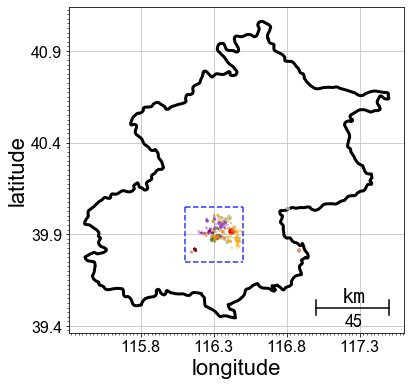

In [10]:
fig= plt.figure(figsize=(6,6))      #只有进流量的区域
ax = fig.add_subplot(1,1,1)  
fig.set_facecolor('white')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))#设置x主坐标间隔 1       
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.025))#设置x从坐标间隔 0.1    经度相差1度  距离随纬度变化
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))#设置y主坐标间隔 1
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))#设置y从坐标间隔 0.1    纬度相差1度是111公里
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')#由每个x主坐标出发对x主坐标画垂直于x轴的线段
#ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')#由每个x主坐标出发对x主坐标画垂直于x轴的线段
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
#plt.title("All starting points",fontsize=18)    #所有出发点
ax.set_xlabel("longitude",fontdict={'size'   : 22,"family":"Arial"})#经度
ax.set_ylabel("latitude",fontdict={ 'size'   : 22,"family":"Arial"})#纬度
#ax.scatter(cx,cy,color="red",s=30)
my_x_ticks = np.arange(115.3, 117.7,0.5)
plt.xticks(my_x_ticks)
my_y_ticks = np.arange(39.4, 41.2,0.5)
plt.yticks(my_y_ticks)
plt.yticks(fontproperties = 'Arial')
plt.xticks(fontproperties = 'Arial')

plt.tick_params(labelsize=16)
plt.plot(bj_x,bj_y,color="black",linewidth="3")

for i in range(len(path)):#某个用户
    for j in range(len(path[i])):
        lon,lat=str_num(path[i][j])
        colo=col[i]
        plt.plot(lat,lon,alpha=0.4,color=colo,linewidth=2)
ax.scatter(cx,cy,color="red",s=30)
plt.plot(x12,y12,color='blue',alpha=0.8,ls='--')
plt.plot(x13,y13,color='blue',alpha=0.8,ls='--')
plt.plot(x34,y34,color='blue',alpha=0.8,ls='--')
plt.plot(x42,y42,color='blue',alpha=0.8,ls='--')
plt.plot(xx1,yy1,color='black')
plt.plot(xx2,yy2,color='black')
plt.plot(xx3,yy2,color='black')
plt.text(117.18,39.53, 'km',fontdict=dict(fontsize=20,family='monospace'))
plt.text(117.2,39.4, '45',fontsize=18)
plt.savefig('bj单车.pdf',bbox_inches='tight')

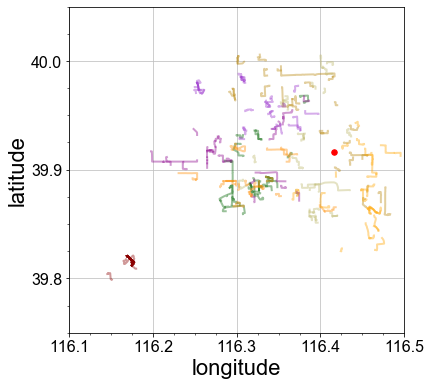

In [11]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1) 
fig.set_facecolor('white')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))#设置x主坐标间隔 1       
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.025))#设置x从坐标间隔 0.1    经度相差1度  距离随纬度变化
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))#设置y主坐标间隔 1
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))#设置y从坐标间隔 0.1    纬度相差1度是111公里
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')#由每个x主坐标出发对x主坐标画垂直于x轴的线段
#ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')#由每个x主坐标出发对x主坐标画垂直于x轴的线段
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
#plt.title("All starting points",fontsize=18)    #所有出发点
ax.set_xlabel("longitude",fontdict={'size'   : 22,"family":"Arial"})#经度
ax.set_ylabel("latitude",fontdict={ 'size'   : 22,"family":"Arial"})#纬度
#ax.scatter(cx,cy,color="red",s=30)
#my_x_ticks = np.arange(115.3, 117.7, 0.1)
#plt.xticks(my_x_ticks)
#my_y_ticks = np.arange(39.4, 41.2, 0.1)
#plt.yticks(my_y_ticks)
plt.xlim(116.1,116.5)
plt.ylim(39.75,40.05)
plt.yticks(fontproperties = 'Arial')
plt.xticks(fontproperties = 'Arial')

plt.tick_params(labelsize=16)
for i in range(len(path)):#某个用户
    for j in range(len(path[i])):
        lon,lat=str_num(path[i][j])
        colo=col[i]
        plt.plot(lat,lon,alpha=0.4,color=colo,linewidth=2)
ax.scatter(cx,cy,color="red",s=30)
plt.savefig('bj单车（1）.pdf',bbox_inches='tight')